In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('./Country-data.csv', delimiter=',')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data_dict = pd.read_csv('./data-dictionary.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


### Data Exploration

Pengecekan null data

In [9]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Distribusi Data

In [ ]:
col = list(data.columns)
col.remove('country')
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,15))
for i in range(1, len(col)):
    plt.subplot(3,3,i)
    sns.distplot(data[col[i]],color ='#b52d7a')
    title = 'Distribution : ' + col[i]
    plt.title(title)
plt.show()

### Tingkat nilai tertinggi dan terendah dari tiap kolom per negara

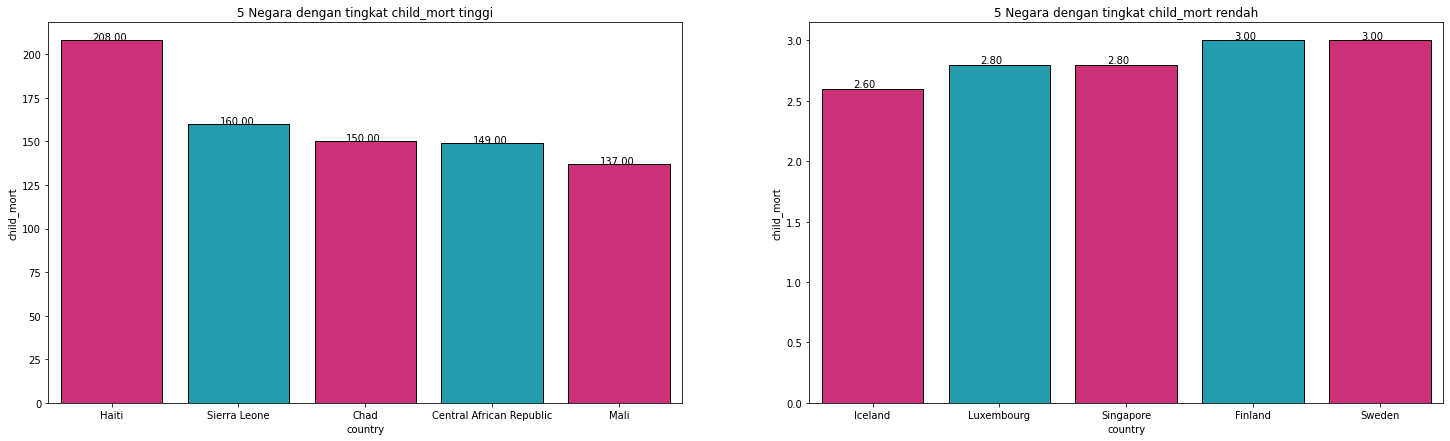

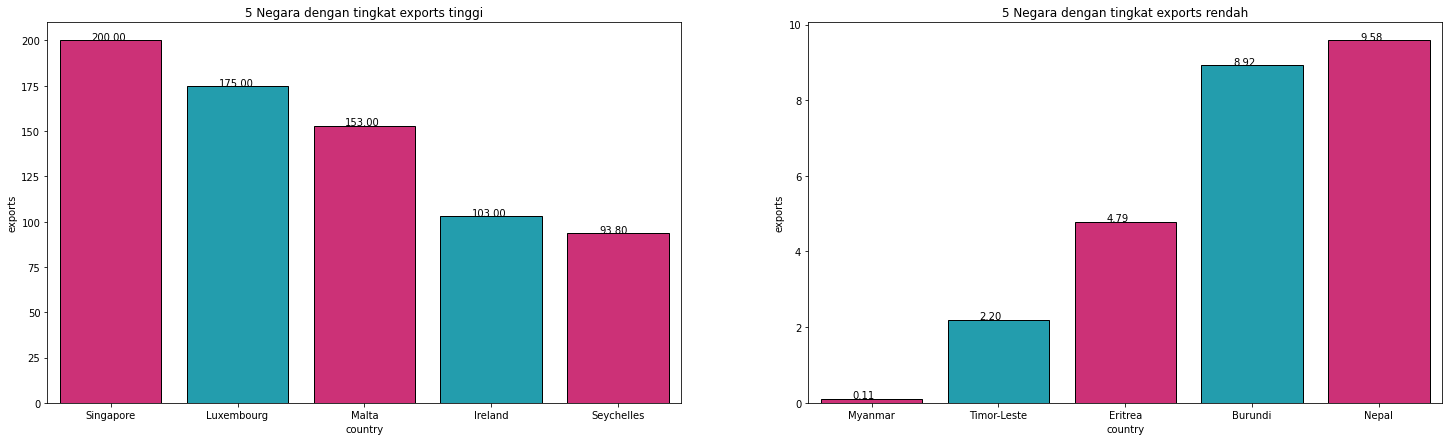

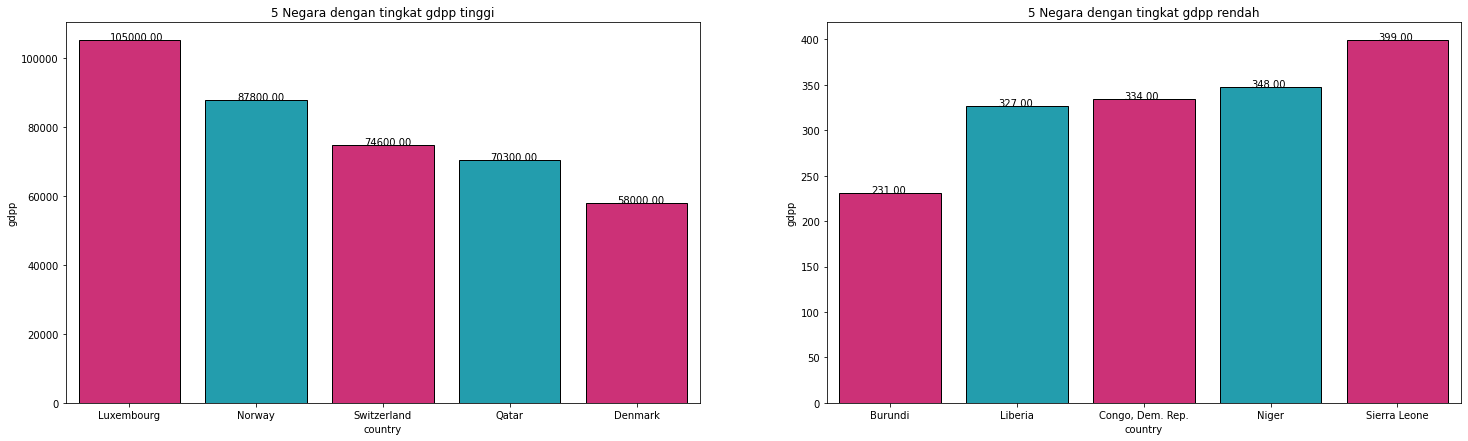

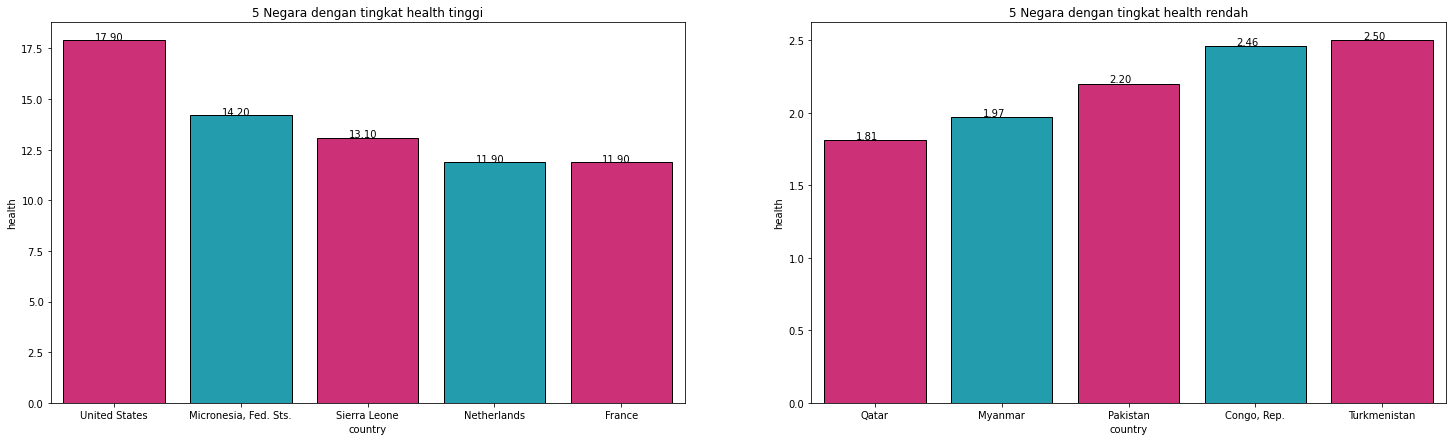

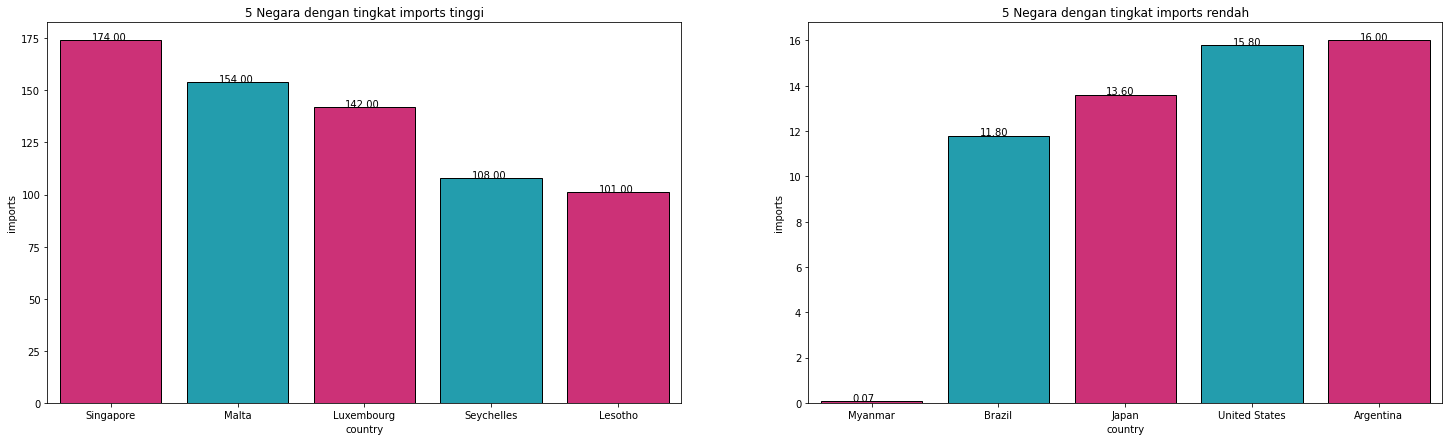

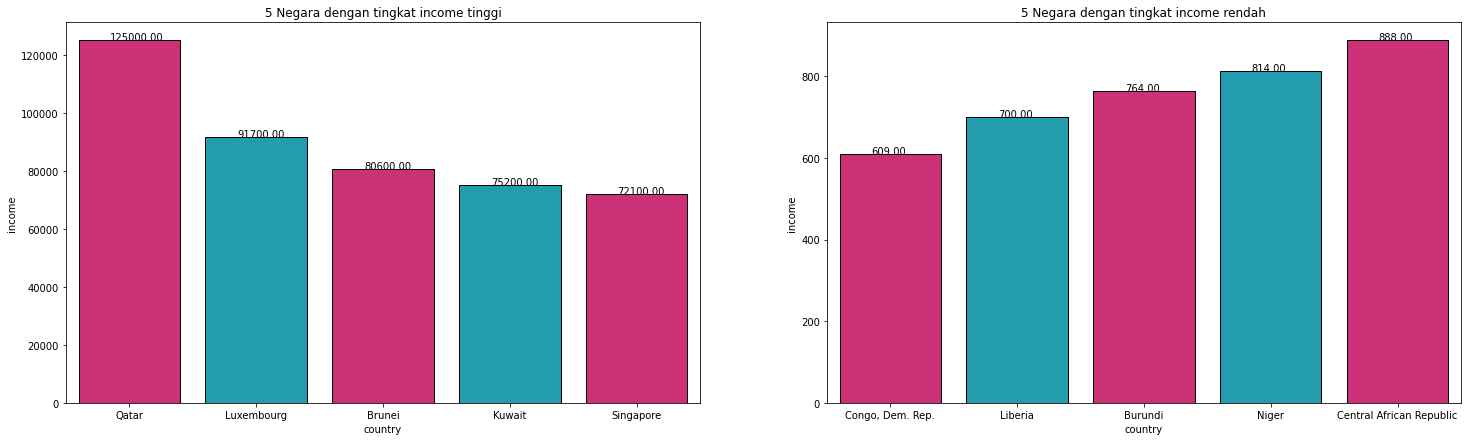

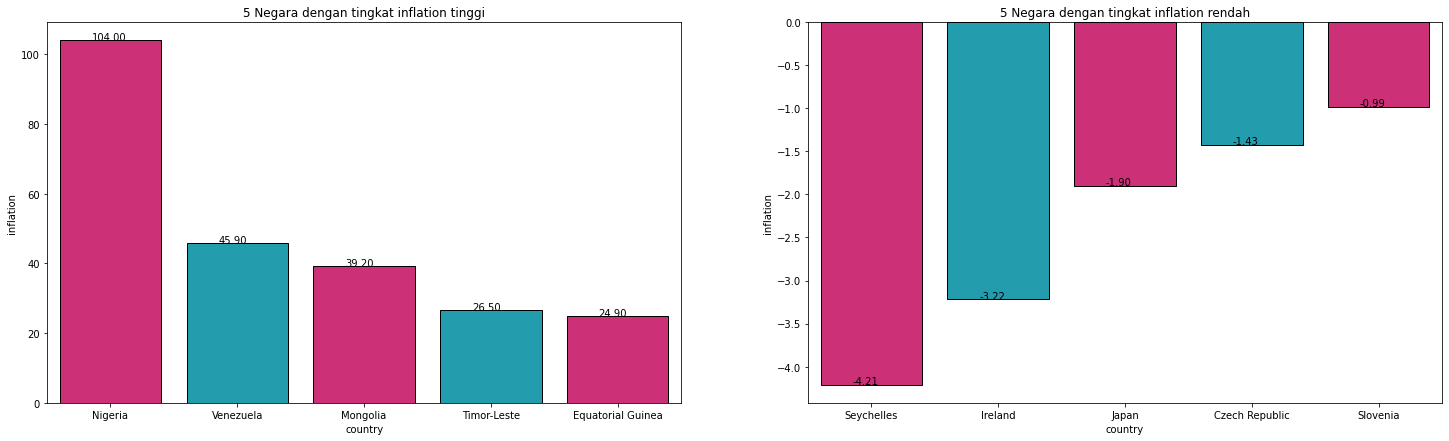

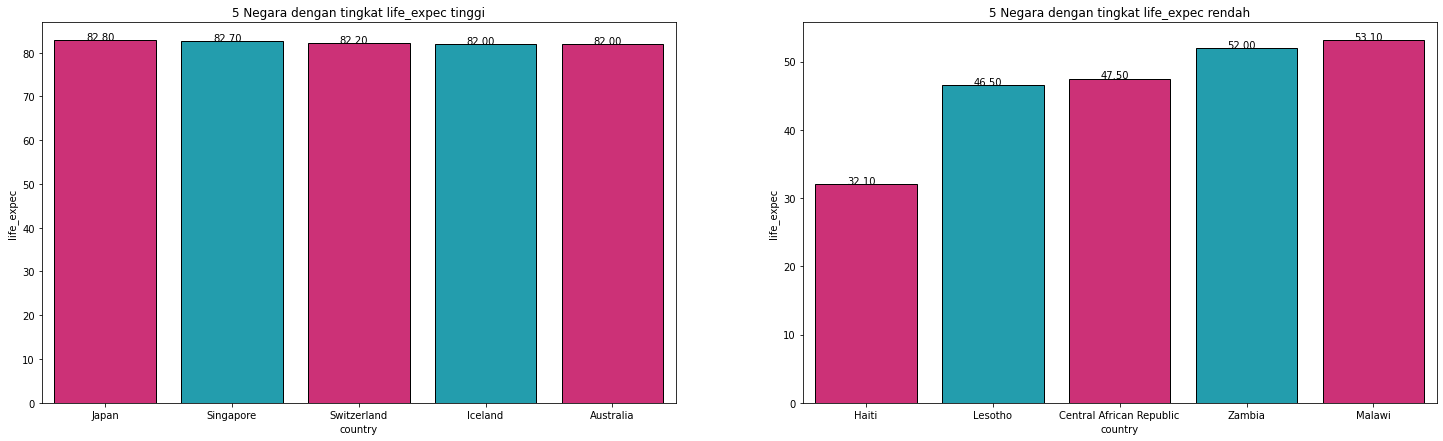

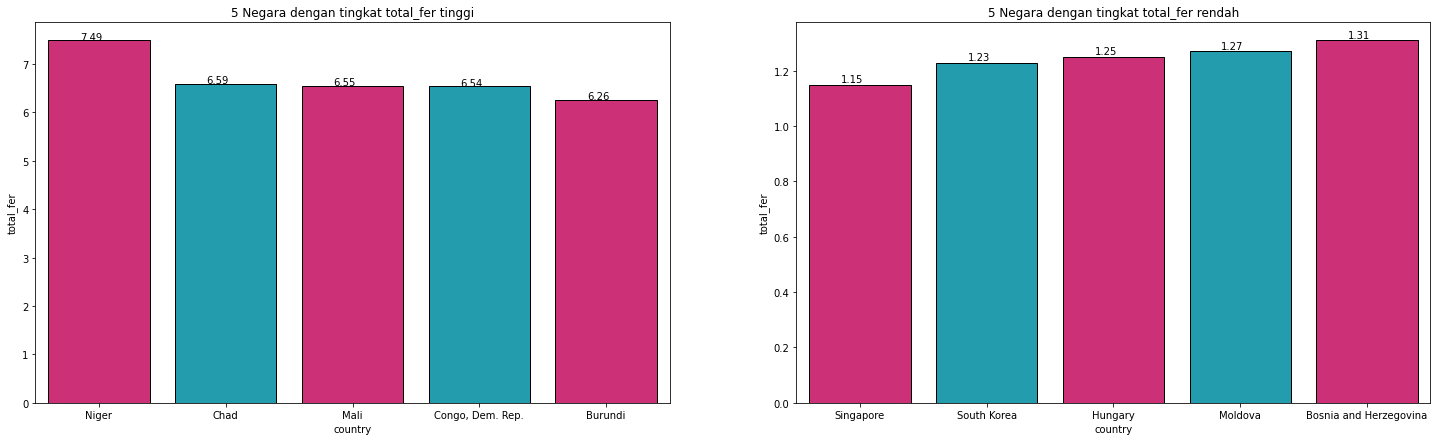

In [473]:
for column in data.columns.difference(['country']):
    fig = plt.subplots(nrows = 1,ncols = 2,figsize = (25,7))
    for j in range(1, 2):
        plt.subplot(1,2,j)
        ax = sns.barplot(x = 'country',y = column, data = data.sort_values(ascending = False,by = column).iloc[:5],palette = ['#e61774', '#0cafc4'],edgecolor = 'black');
        plt.title(f'5 Negara dengan tingkat {column} tinggi')
        for rect in ax.patches:
            ax.annotate('{:.2f}'.format(rect.get_height()), (rect.get_x()+0.25, rect.get_height()+0.01))

        plt.subplot(1,2,2)
        ax = sns.barplot(x = 'country',y = column, data = data.sort_values(by = column).iloc[:5],palette = ['#e61774', '#0cafc4'],edgecolor = 'black');
        plt.title(f'5 Negara dengan tingkat {column} rendah')
        for rect in ax.patches:
            ax.annotate('{:.2f}'.format(rect.get_height()), (rect.get_x()+0.25, rect.get_height()+0.01))


In [474]:
# data.drop(columns=['country'], axis=1, inplace=True)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Kmeans Algorithm

In [117]:
class KMeans:
    def __init__(self, X, num_clusters, max_iter):
        self.K = num_clusters
        self.num_examples, self.num_features = X.shape
        self.max_iterations = max_iter
        
    # init random centroid
    def init_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # make cluster
    def make_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            # menghitung centroid terdekat menggunakan Euclidean Distance
            centroid_terdekat = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1)))
            clusters[centroid_terdekat].append(point_idx)
        return clusters 
    
    # generate new centroids
    def generate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids # new centroids

    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred #return predicion class
        
    # fit data
    def fit(self, X):
        centroids = self.init_random_centroids(X) # init random centroid
        for _ in range(self.max_iterations):
            clusters = self.make_clusters(X, centroids) # make_clusters
            previous_centroids = centroids#
            centroids = self.generate_new_centroids(clusters, X) # generate_new_centroids
            cent_diff = centroids - previous_centroids # calculate difference
            if not cent_diff.any():
                break
        classify = self.predict_cluster(clusters, X) # predict function
        return classify

### Feature selection

In [305]:
ss = StandardScaler()
mms = MinMaxScaler()

#### Kategorisasi fitur

<ul>
    <li>health : child_mort, health, life_expec, total_fer</li>
    <li>trade : imports, exports</li>
    <li>finance : income, inflation, gdpp</li>
</ul>



In [127]:
# kategorisasi
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


#### Normalisasi fitur

<b>Normalisasi</b> adalah teknik perubahan skala, yang pada konteks ini merubah nilai dari data kedalam skala diantara 0–1.</br>

In [128]:
# Fungsi untuk normalisasi (min max scaller)
def min_max_scaller(data):
    return (data - data.min()) / (data.max() - data.min())
    
# Lakukan normalisasi
df1['Health'] = min_max_scaller(df1[['Health']])
df1['Trade'] = min_max_scaller(df1[['Trade']])
df1['Finance'] = min_max_scaller(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


##### PCA(Principal Component Analysis)

In [126]:
df2 = data.copy(deep = True)
col = list(data.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']])

for i in col:
    df2[i] = mms.fit_transform(df2[[i]])
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [ ]:
pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
print(pca.explained_variance_ratio_)

plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [ ]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

Prepare PCA features

In [ ]:
# pca_values = pca_df2.values

### Plot data

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\3840840607.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\3840840607.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\AppData\Local\Temp\ipykernel_12488\3840840607.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\3840840607.py:6: UserWarning

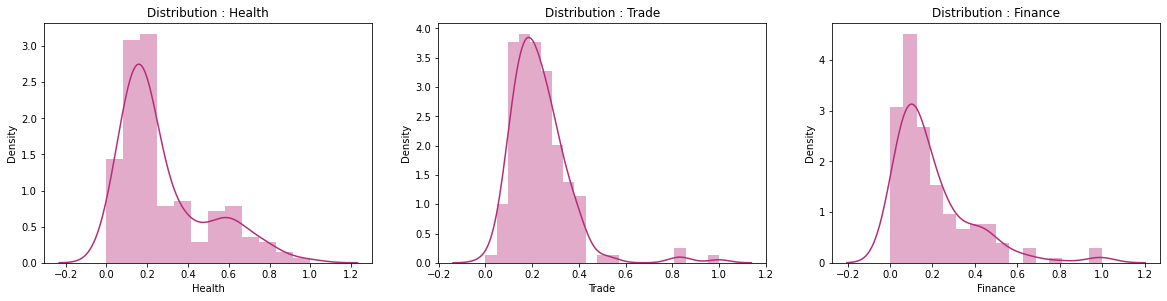

In [92]:
col = list(df1.columns)
col.remove('Country')
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,15))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.distplot(df1[col[i]],color ='#b52d7a')
    title = 'Distribution : ' + col[i]
    plt.title(title)


### Modelling

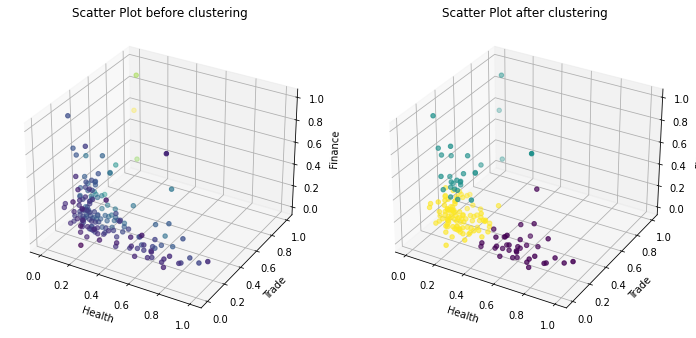

In [129]:
# model = KMeans(n_clusters = 3,max_iter = 100)
# model.fit(grouping_values)
# cluster = model.cluster_centers_
# centroids = np.array(cluster)
# labels = model.labels_
# data['Class'] = labels;

grouping_values = df1.drop(columns = ['Country']).values
Kmeans = KMeans(grouping_values, 3, 100)
y_pred = Kmeans.fit(grouping_values)
data['Class'] = y_pred
df1['Class'] = y_pred

# Creating dataset
x = df1['Health']
y = df1['Trade']
z = df1['Finance']


fig = plt.figure(figsize=(12,7))
# Creating figure

# fig = plt.figure(figsize = (12, 7))
ax1 = fig.add_subplot(1,2,1,projection ="3d")
# Creating plot
plt.subplot(1,2,1)
ax1.scatter(x, y, z,c=y)
plt.title("Scatter Plot before clustering")
ax1.set_xlabel('Health')
ax1.set_ylabel('Trade')
ax1.set_zlabel('Finance')
# show plot

ax2 = fig.add_subplot(1,2,2,projection ="3d")
# Creating plot
ax2.scatter(x, y, z,c=y_pred.astype(int))
plt.title("Scatter Plot after clustering")
ax2.set_xlabel('Health')
ax2.set_ylabel('Trade')
ax2.set_zlabel('Finance')
# show plot
plt.show()

In [94]:
data.to_excel('country_data_cluster.xlsx')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1.0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.0


In [130]:
df1

,Country,Health,Trade,Finance,Class
0,Afghanistan,0.625740,0.139614,0.079820,0.0
1,Albania,0.127451,0.199901,0.088756,2.0
2,Algeria,0.182485,0.186622,0.212808,2.0
3,Angola,0.661381,0.283058,0.236946,0.0
4,Antigua and Barbuda,0.116409,0.275189,0.145043,2.0
...,...,...,...,...,...
162,Vanuatu,0.217274,0.262886,0.035009,2.0
163,Venezuela,0.133337,0.124193,0.559740,1.0
164,Vietnam,0.170070,0.403386,0.121436,2.0
165,Yemen,0.397451,0.170248,0.229632,2.0


### Penentuan penyebaran bantuan

Diketahui bahwa negara-negara terbelakang secara ekonomi memiliki angka kematian bayi yang tinggi.
Maka untuk menentukan penyaluran bantuan kita mengacu pada hal tersebut. Yaitu dengan mempertimbangkan data child_mort dan income

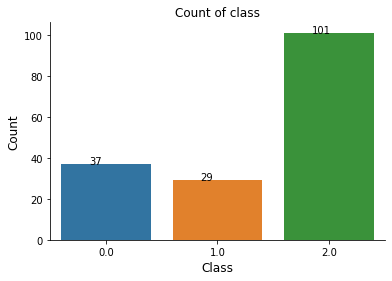

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\289372318.py:18: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\289372318.py:22: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



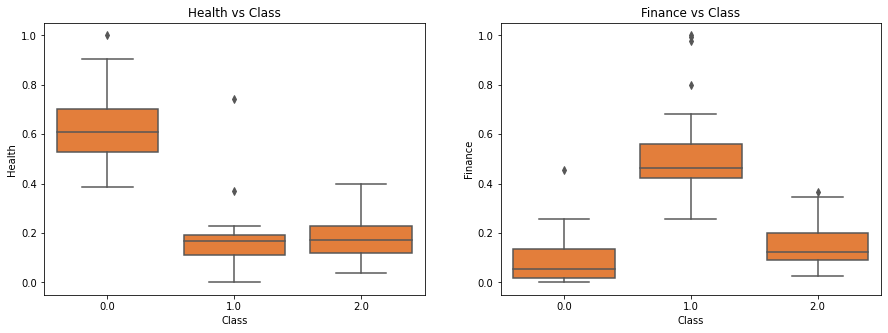

In [131]:
#Counter plot untuk class dari setiap negara
plt.title('Count of class')

ax = sns.countplot(data = df1, x = df1.Class)
plt.ylabel('Count', size=12)
plt.xlabel('Class', size=12)

# value on top of bar
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Plot untuk child_mort dan income
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'Health', data  = df1, color = '#FF781F');
plt.title('Health vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'Finance', data  = df1, color = '#FF781F');
plt.title('Finance vs Class')

plt.show()

In [137]:
df1['Class'].loc[df1['Class'] == 0] = 'Sedikit butuh bantuan'
df1['Class'].loc[df1['Class'] == 1] = 'Tidak butuh bantuan'
df1['Class'].loc[df1['Class'] == 2] = 'Sangat butuh bantuan'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Penyaluran bantuan tiap negara sesuai dengan class',
                    color = df1['Class'],  
                    color_discrete_map = {'Sangat butuh bantuan' : '#e3126d',
                                          'Sedikit butuh bantuan' : '#edcd58',
                                          'Tidak butuh bantuan' : '#65c298'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\80847234.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\80847234.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\80847234.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

